import packages needed

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

Question 1

In [120]:
Energy_use = pd.read_csv("per-capita-energy-use.csv") #read data from csv file
Energy_use = Energy_use.rename(columns={"Primary energy consumption per capita (kWh/person)":"Energy_use"})
Energy_use = Energy_use.dropna() #Remove the rows with missing country codes. 
df_energy=Energy_use[Energy_use["Code"].str.match("OWID")] #Filter and store 


Question 2

In [121]:
print(df_energy.info())
n_row , n_col = df_energy.shape # analyze and fill in blanks
n_year=len(df_energy["Year"].unique())
print(("The data frame has {} rows and {} columns.").format(n_row,n_col))
print(("There are {} unique years represented in the data frame.").format(n_year))

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 2387 to 10517
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      138 non-null    object 
 1   Code        138 non-null    object 
 2   Year        138 non-null    int64  
 3   Energy_use  138 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB
None
The data frame has 138 rows and 4 columns.
There are 58 unique years represented in the data frame.


As the output shown above ,The data frame has 138 rows and 4 columns and There are 58 unique years represented in the data frame.

Question 3

In [122]:
UNSD = pd.read_excel("UNSD — Methodology.xlsx") #import data from excel file
list = ["LDC", "LLDC", "SIDS" ] 
for i in range(0,3):
    UNSD = UNSD.rename(columns={UNSD.columns[-i-1]:list[-i-1]}) #rename columns
UNSD[["LDC","LLDC","SIDS"]]=UNSD[["LDC","LLDC","SIDS"]].replace(["x",UNSD["LDC"][1]],[1,0]) #replace missing value
df_regions = UNSD #stroe resulting data

C:\Users\admin\AppData\Local\Temp\ipykernel_20392\3421652490.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  UNSD[["LDC","LLDC","SIDS"]]=UNSD[["LDC","LLDC","SIDS"]].replace(["x",UNSD["LDC"][1]],[1,0]) #replace missing value


Question 4

In [123]:
df_regions = df_regions.rename(columns={"ISO-alpha3 Code":"Code"})
df_regions.set_index(['Code'])
merged_energy = Energy_use.merge(df_regions,how="left")

Question 5

In [124]:
mismatch = merged_energy[merged_energy['LDC'].isna()] #Identify the rows not matched 
print(mismatch) #display rows not matched
merged_energy = merged_energy[merged_energy['LDC'].notna()] #remove rows not matched


              Entity      Code  Year  Energy_use Region Name Country or Area  \
2271  Czechoslovakia  OWID_CZS  1980   59968.387         NaN             NaN   
2272  Czechoslovakia  OWID_CZS  1981   59334.582         NaN             NaN   
2273  Czechoslovakia  OWID_CZS  1982   59640.566         NaN             NaN   
2274  Czechoslovakia  OWID_CZS  1983   59913.348         NaN             NaN   
2275  Czechoslovakia  OWID_CZS  1984   60268.920         NaN             NaN   
...              ...       ...   ...         ...         ...             ...   
9891      Yugoslavia  OWID_YGS  1987   37696.410         NaN             NaN   
9892      Yugoslavia  OWID_YGS  1988   37751.660         NaN             NaN   
9893      Yugoslavia  OWID_YGS  1989   37865.082         NaN             NaN   
9894      Yugoslavia  OWID_YGS  1990   37077.207         NaN             NaN   
9895      Yugoslavia  OWID_YGS  1991   32609.102         NaN             NaN   

      LDC  LLDC  SIDS  
2271  NaN   NaN

In [125]:
print("The merged_energy data frame has {} rows and {}columns.".format(merged_energy.shape[0],merged_energy.shape[1]))
print(("There are {} unique countries/area being represented in the merged_energy data frame.").format(
    len(merged_energy["Country or Area"].unique())))

The merged_energy data frame has 9771 rows and 9columns.
There are 215 unique countries/area being represented in the merged_energy data frame.


Question 6

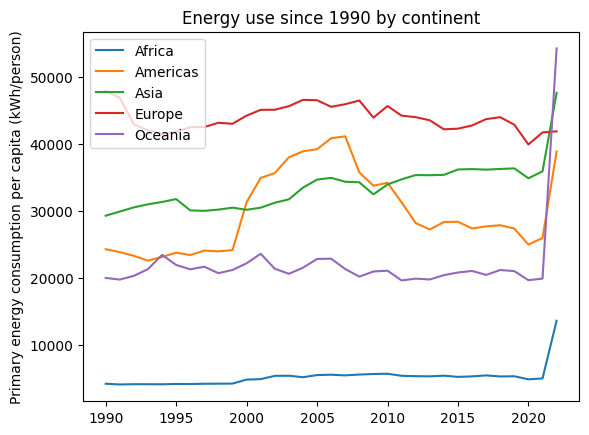

In [126]:
plot_data = merged_energy.groupby(["Region Name","Year"])[['Energy_use']].mean().reset_index()
plot_data = plot_data.query("Year >= 1990") #select rows that has a bigger or equal value than 1990
for i in plot_data["Region Name"].unique():
    df = plot_data[plot_data["Region Name"] == i]
    plt.plot(df["Year"],df['Energy_use'],label = i) # graph different lines

plt.ylabel("Primary energy consumption per capita (kWh/person)") #set ylabel
plt.title("Energy use since 1990 by continent")
plt.legend(loc = "upper left") #show the legend and set the position
plt.show()

Question 7

In [127]:
data_2021 = merged_energy.query("Year == 2021").rename(columns={"Energy_use":"energy_2021"}).set_index("Code") # select subset and rename the energy_use column
data_2022 = merged_energy.query("Year == 2022").rename(columns={"Energy_use":"energy_2022"}).set_index("Code")

In [128]:
data_2021 = data_2021["energy_2021"]
data_dif = data_2022.merge(data_2021,how='left', on="Code") #merge the subset so we can calculate the data
data_dif = data_dif.reset_index()
data_dif["energy_dif"]=data_dif["energy_2022"]-data_dif["energy_2021"] #calculate data
data_dif["energy_dif_PCT"]=(data_dif["energy_2022"]-data_dif["energy_2021"])/data_dif["energy_2021"]*100

In [129]:
df_top_countries = data_dif[data_dif["energy_dif"].isin(data_dif.groupby("Region Name")['energy_dif'].agg("max"))]# select the countries that have biggest change among every continent

Question 8

In [130]:
df_largest_change = pd.concat([data_dif.sort_values("energy_dif_PCT")[0:5],data_dif.sort_values("energy_dif_PCT",ascending= False)[0:5]]) #sort the database by the percentage terms and select the top 5 from both the ascending order and the descending order
df_largest_change = df_largest_change.sort_values("energy_dif_PCT",ascending=False) # sort again for a better outcome in barchart

Qustion 9

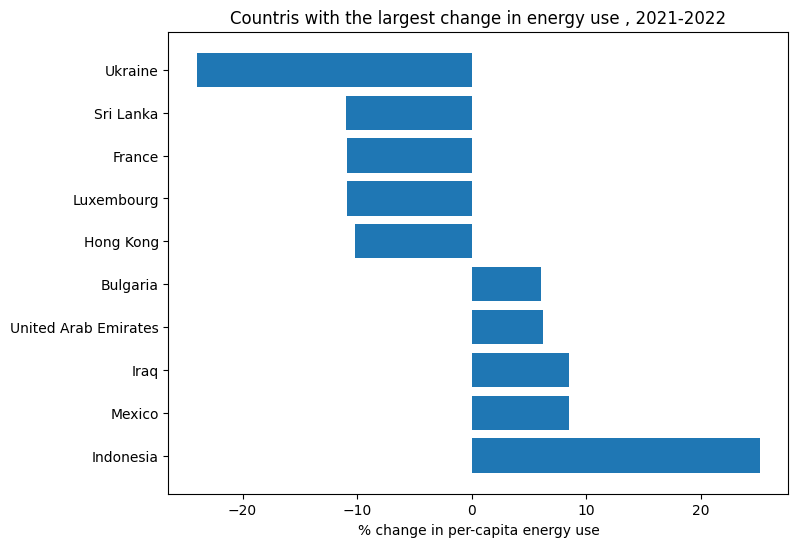

In [131]:
plt.figure(figsize=(8,6))
plt.barh(df_largest_change['Entity'],df_largest_change['energy_dif_PCT'])
plt.xlabel("% change in per-capita energy use")
plt.title("Countris with the largest change in energy use , 2021-2022")
plt.show()

Needed databases are showed belowed

In [132]:
df_energy

,Entity,Code,Year,Energy_use
2387,Czechoslovakia,OWID_CZS,1980,59968.387
2388,Czechoslovakia,OWID_CZS,1981,59334.582
2389,Czechoslovakia,OWID_CZS,1982,59640.566
2390,Czechoslovakia,OWID_CZS,1983,59913.348
2391,Czechoslovakia,OWID_CZS,1984,60268.920
...,...,...,...,...
10513,Yugoslavia,OWID_YGS,1987,37696.410
10514,Yugoslavia,OWID_YGS,1988,37751.660
10515,Yugoslavia,OWID_YGS,1989,37865.082
10516,Yugoslavia,OWID_YGS,1990,37077.207


In [133]:
df_regions

,Region Name,Country or Area,Code,LDC,LLDC,SIDS
0,Asia,Afghanistan,AFG,1.0,1.0,0.0
1,Europe,Åland Islands,ALA,0.0,0.0,0.0
2,Europe,Albania,ALB,0.0,0.0,0.0
3,Africa,Algeria,DZA,0.0,0.0,0.0
4,Oceania,American Samoa,ASM,0.0,0.0,1.0
...,...,...,...,...,...,...
243,Oceania,Wallis and Futuna Islands,WLF,0.0,0.0,0.0
244,Africa,Western Sahara,ESH,0.0,0.0,0.0
245,Asia,Yemen,YEM,1.0,0.0,0.0
246,Africa,Zambia,ZMB,1.0,1.0,0.0


In [134]:
merged_energy

,Entity,Code,Year,Energy_use,Region Name,Country or Area,LDC,LLDC,SIDS
0,Afghanistan,AFG,1980,623.92865,Asia,Afghanistan,1.0,1.0,0.0
1,Afghanistan,AFG,1981,786.83690,Asia,Afghanistan,1.0,1.0,0.0
2,Afghanistan,AFG,1982,926.65125,Asia,Afghanistan,1.0,1.0,0.0
3,Afghanistan,AFG,1983,1149.19590,Asia,Afghanistan,1.0,1.0,0.0
4,Afghanistan,AFG,1984,1121.57290,Asia,Afghanistan,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9975,Zimbabwe,ZWE,2017,3068.01150,Africa,Zimbabwe,0.0,1.0,0.0
9976,Zimbabwe,ZWE,2018,3441.98580,Africa,Zimbabwe,0.0,1.0,0.0
9977,Zimbabwe,ZWE,2019,3003.65530,Africa,Zimbabwe,0.0,1.0,0.0
9978,Zimbabwe,ZWE,2020,2680.13180,Africa,Zimbabwe,0.0,1.0,0.0


In [135]:
df_top_countries

,Code,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021,energy_dif,energy_dif_PCT
2,AUS,Australia,2022,63458.8400,Oceania,Australia,0.0,0.0,0.0,61439.91,2018.9300,3.286024
19,EGY,Egypt,2022,9960.0625,Africa,Egypt,0.0,0.0,0.0,9639.12,320.9425,3.329583
27,ISL,Iceland,2022,165870.8800,Europe,Iceland,0.0,0.0,0.0,156923.66,8947.2200,5.701639
72,ARE,United Arab Emirates,2022,148576.5500,Asia,United Arab Emirates,0.0,0.0,0.0,139828.77,8747.7800,6.256066
74,USA,United States,2022,78754.2700,Americas,United States of America,0.0,0.0,0.0,76988.75,1765.5200,2.293218


In [136]:
df_largest_change

,Code,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021,energy_dif,energy_dif_PCT
29,IDN,Indonesia,2022,9854.455,Asia,Indonesia,0.0,0.0,0.0,7871.8433,1982.6117,25.186117
42,MEX,Mexico,2022,19009.186,Americas,Mexico,0.0,0.0,0.0,17515.2050,1493.9810,8.529623
31,IRQ,Iraq,2022,14392.053,Asia,Iraq,0.0,0.0,0.0,13267.2780,1124.7750,8.477813
72,ARE,United Arab Emirates,2022,148576.550,Asia,United Arab Emirates,0.0,0.0,0.0,139828.7700,8747.7800,6.256066
9,BGR,Bulgaria,2022,34175.520,Europe,Bulgaria,0.0,0.0,0.0,32216.7050,1958.8150,6.080122
25,HKG,Hong Kong,2022,29152.305,Asia,"China, Hong Kong SAR",0.0,0.0,0.0,32466.9730,-3314.6680,-10.209353
40,LUX,Luxembourg,2022,60334.330,Europe,Luxembourg,0.0,0.0,0.0,67687.9100,-7353.5800,-10.863949
22,FRA,France,2022,36051.793,Europe,France,0.0,0.0,0.0,40464.4650,-4412.6720,-10.905055
64,LKA,Sri Lanka,2022,4347.636,Asia,Sri Lanka,0.0,0.0,0.0,4884.5293,-536.8933,-10.991710
71,UKR,Ukraine,2022,16309.124,Europe,Ukraine,0.0,0.0,0.0,21459.9450,-5150.8210,-24.002023
